Utworzono folder: Finalne_Zestawienie
--- OBLICZANIE R^2 (DOKŁADNOŚCI) ---
Model: Las Losowy                | R2: 0.9742 | Suma: 92.41 mln
Model: Wzmocnienie Gradientowe   | R2: 0.9838 | Suma: 93.98 mln
Model: Drzewo Decyzyjne          | R2: 0.9703 | Suma: 93.21 mln
Model: Regresja Liniowa          | R2: 0.9869 | Suma: 93.86 mln


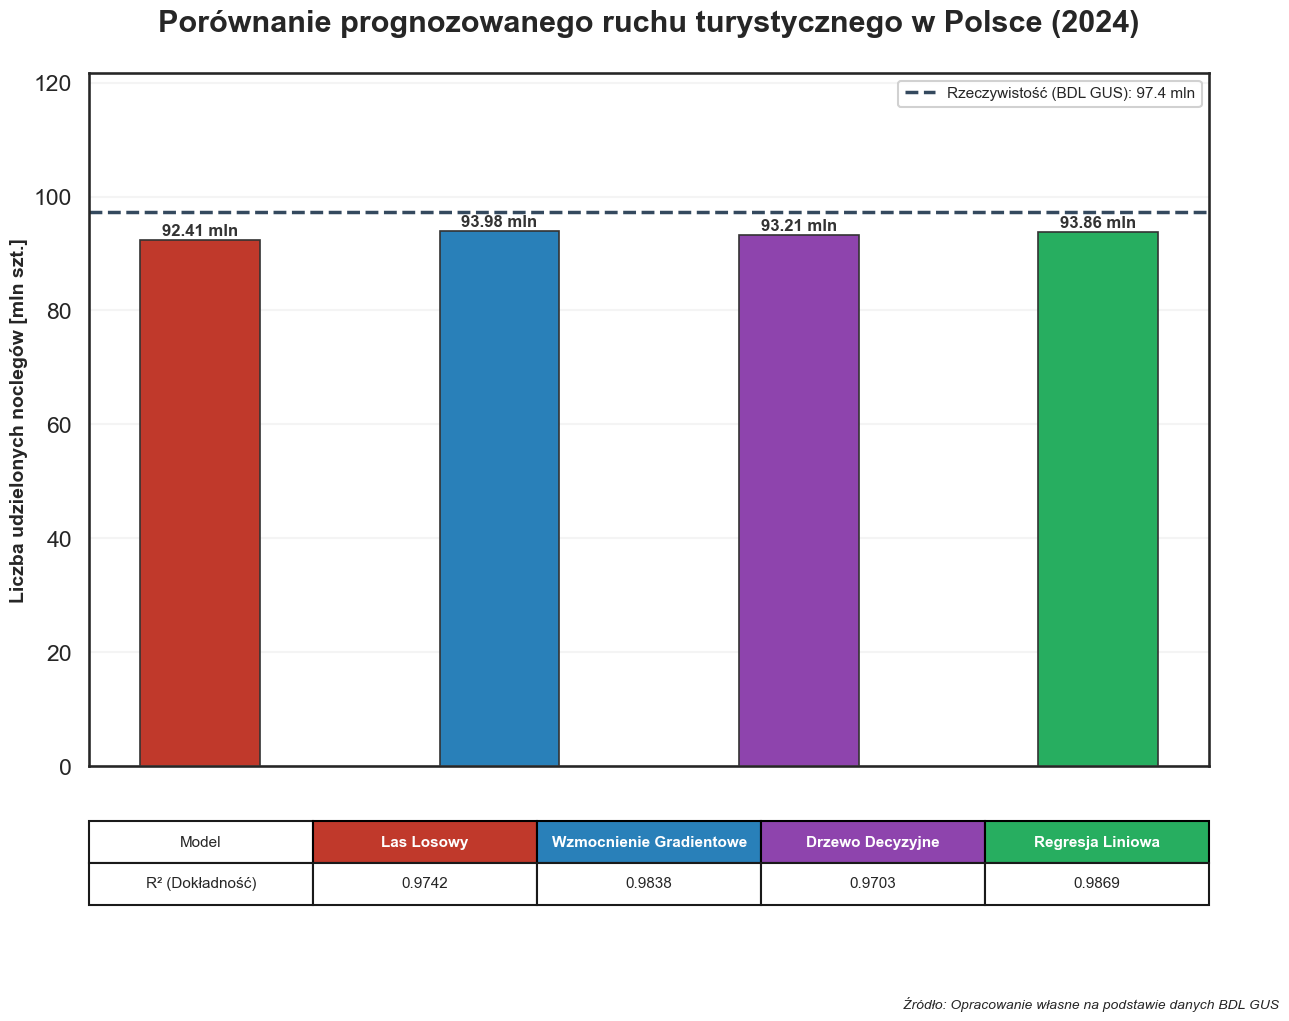


Gotowe! Wykres zapisany w: Finalne_Zestawienie\Final_Porownanie_Modeli_R2.png
Wartości R^2 zostały obliczone na podstawie Twoich plików.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import os

# --- USTAWIENIA STYLU ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. TWORZENIE FOLDERU NA WYNIK KOŃCOWY
final_folder = "Finalne_Zestawienie"
os.makedirs(final_folder, exist_ok=True)
print(f"Utworzono folder: {final_folder}")

# 2. KONFIGURACJA ŚCIEŻEK
# Kod sprawdzi Twoje lokalne ścieżki. Jeśli nie znajdzie, spróbuje nazw plików bezpośrednio.
models_config = [
    {
        "name": "Las Losowy", 
        "path": r"Regresja Lasów Losowych\Wyniki_Walidacja_2024.csv", 
        "filename": "Wyniki_Walidacja_2024.csv",
        "col_pred": "Prognoza", 
        "col_true": "Udzielone_Noclegi",
        "color": "#c0392b" # Stonowany Czerwony
    },
    {
        "name": "Wzmocnienie Gradientowe", 
        "path": r"Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv",
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#2980b9" # Stonowany Niebieski
    },
    {
        "name": "Drzewo Decyzyjne", 
        "path": r"Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv",
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#8e44ad" # Stonowany Fiolet
    },
    {
        "name": "Regresja Liniowa", 
        "path": r"Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv",
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#27ae60" # Stonowany Zielony
    }
]

# Zbieranie danych
chart_data = []
real_sum = 0
r2_values = {}

print("--- OBLICZANIE R^2 (DOKŁADNOŚCI) ---")

for m in models_config:
    # Próba otwarcia pliku (ścieżka z folderem LUB sam plik)
    file_path = m['path'] if os.path.exists(m['path']) else m['filename']
    
    if os.path.exists(file_path):
        try:
            # Wczytanie (obsługa ; i ,)
            df = pd.read_csv(file_path, sep=';')
            if df.shape[1] < 2: df = pd.read_csv(file_path, sep=',')
            
            if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                y_true = df[m['col_true']]
                y_pred = df[m['col_pred']]
                
                # 1. Suma do wykresu
                total_pred = y_pred.sum()
                
                # 2. Obliczanie R2 (Tu jest matematyka!)
                r2 = r2_score(y_true, y_pred)
                r2_values[m['name']] = f"{r2:.4f}" # Formatowanie do 4 miejsc po przecinku
                
                chart_data.append({
                    "Model": m['name'],
                    "Suma": total_pred,
                    "Color": m['color']
                })
                
                # Zapisujemy rzeczywistą sumę raz
                if real_sum == 0: real_sum = y_true.sum()
                
                print(f"Model: {m['name']:<25} | R2: {r2:.4f} | Suma: {total_pred/1e6:.2f} mln")
        except Exception as e:
            print(f"Błąd pliku {file_path}: {e}")
    else:
        print(f"Brak pliku: {file_path}")

df_chart = pd.DataFrame(chart_data)

# =========================================================
# TWORZENIE WYKRESU (FINALNA WERSJA)
# =========================================================
if not df_chart.empty:
    fig, ax = plt.subplots(figsize=(14, 11))

    # 1. Rysujemy Słupki (Cienkie i eleganckie)
    bars = ax.bar(
        df_chart['Model'], 
        df_chart['Suma'] / 1_000_000, 
        color=df_chart['Color'], 
        edgecolor='#333333',
        linewidth=1.2,
        width=0.4, # Cieńsze słupki
        zorder=3
    )

    # 2. Linia Rzeczywistości (Przecina słupki)
    ax.axhline(
        y=real_sum/1_000_000, 
        color='#34495e', # Ciemny granat
        linestyle='--', 
        linewidth=2.5, 
        label=f'Rzeczywistość (BDL GUS): {real_sum/1_000_000:.1f} mln',
        zorder=2
    )

    # 3. Podpisy wartości
    for bar in bars:
        height = bar.get_height()
        # Jeśli słupek jest wyższy niż linia, podpisz wyżej, jeśli niższy - też nad słupkiem
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.3, 
            f'{height:.2f} mln', 
            ha='center', va='bottom', 
            fontweight='bold', fontsize=12, color='#333333'
        )

    # 4. Tytuły i formatowanie
    ax.set_title("Porównanie prognozowanego ruchu turystycznego w Polsce (2024)", fontsize=22, fontweight='bold', pad=30)
    ax.set_ylabel("Liczba udzielonych noclegów [mln szt.]", fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='-', alpha=0.2, zorder=0)

    # Limit Y (+20% miejsca u góry)
    max_y = max((df_chart['Suma'].max()/1e6), (real_sum/1e6))
    ax.set_ylim(0, max_y * 1.25)

    # 5. TABELA Z R2 POD WYKRESEM
    table_cols = ["Model"] + df_chart['Model'].tolist()
    # Wiersz z wartościami R2
    table_vals = [["R² (Dokładność)"] + [r2_values[m] for m in df_chart['Model']]]

    the_table = plt.table(
        cellText=table_vals,
        colLabels=table_cols,
        loc='bottom',
        bbox=[0.0, -0.2, 1.0, 0.12], # Pozycja tabeli
        cellLoc='center'
    )

    # Styl tabeli
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.5)

    # Kolorowanie nagłówków
    for i, key in enumerate(df_chart['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_chart.iloc[i]['Color'])
        cell.set_edgecolor('black')

    # Ukrycie osi X (bo mamy tabelę)
    ax.set_xticks([]) 

    # Legenda i źródło (ZAKTUALIZOWANE)
    ax.legend(loc='upper right', frameon=True, fontsize=11, framealpha=0.9)
    plt.figtext(0.95, 0.03, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')

    # Marginesy
    plt.subplots_adjust(left=0.1, bottom=0.25)

    # ZAPIS DO PLIKU
    save_path = os.path.join(final_folder, "Final_Porownanie_Modeli_R2.png")
    plt.savefig(save_path, dpi=300)
    plt.show()

    print(f"\nGotowe! Wykres zapisany w: {save_path}")
    print("Wartości R^2 zostały obliczone na podstawie Twoich plików.")

else:
    print("Nie udało się wczytać danych. Sprawdź czy pliki .csv istnieją w odpowiednich folderach.")

Utworzono folder na wyniki: Final_Porownanie_Modeli_R2

--- ROZPOCZYNAM OBLICZANIE METRYK ---
Przeliczono: Wzmocnienie Gradientowe   | R2: 0.9838 | RMSE: 95,343
Przeliczono: Las Losowy                | R2: 0.9742 | RMSE: 120,187
Przeliczono: Regresja Liniowa          | R2: 0.9869 | RMSE: 85,510
Przeliczono: Drzewo Decyzyjne          | R2: 0.9703 | RMSE: 128,984
Zapisano pełną tabelę z danymi: Final_Porownanie_Modeli_R2\Tabela_Metryk_Full.csv


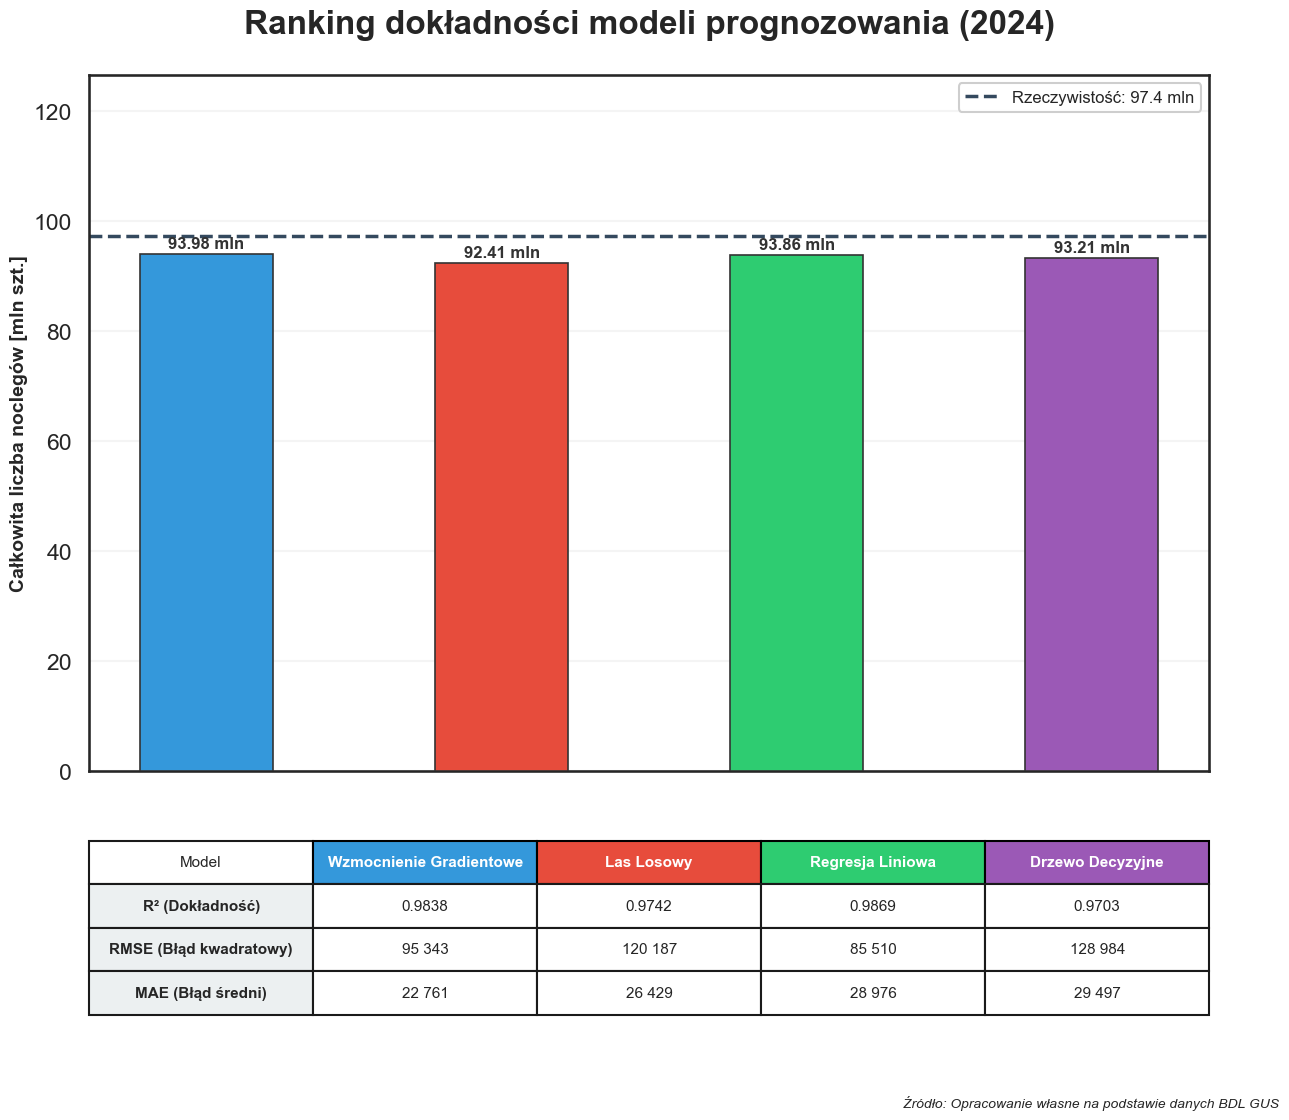


GOTOWE! Wszystkie wyniki w folderze: Final_Porownanie_Modeli_R2
1. Tabela z danymi: Final_Porownanie_Modeli_R2\Tabela_Metryk_Full.csv
2. Wykres z metrykami: Final_Porownanie_Modeli_R2\Wykres_Ranking_Modele.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# --- USTAWIENIA STYLU (PROFESJONALNY) ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. TWORZENIE FOLDERU NA WYNIKI
output_folder = "Final_Porownanie_Modeli_R2"
os.makedirs(output_folder, exist_ok=True)
print(f"Utworzono folder na wyniki: {output_folder}")

# 2. KONFIGURACJA ŚCIEŻEK DO PLIKÓW
# Kod szuka plików w folderach, które stworzyliśmy wcześniej.
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", # Zwycięzca (wg Twoich danych)
        "path": r"Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv",
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#3498db" # Niebieski
    },
    {
        "name": "Las Losowy", 
        "path": r"Regresja Lasów Losowych\Wyniki_Walidacja_2024.csv",
        "filename": "Wyniki_Walidacja_2024.csv",
        "col_pred": "Prognoza", 
        "col_true": "Udzielone_Noclegi",
        "color": "#e74c3c" # Czerwony
    },
    {
        "name": "Regresja Liniowa", 
        "path": r"Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv",
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#2ecc71" # Zielony
    },
    {
        "name": "Drzewo Decyzyjne", 
        "path": r"Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv",
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#9b59b6" # Fioletowy
    }
]

results = []
real_sum_global = 0

print("\n--- ROZPOCZYNAM OBLICZANIE METRYK ---")

# 3. PĘTLA PRZETWARZANIA DANYCH
for m in models_config:
    # Sprawdzamy czy plik jest w podfolderze CZY w bieżącym folderze
    file_path = m['path'] if os.path.exists(m['path']) else m['filename']
    
    if os.path.exists(file_path):
        try:
            # Wczytanie (separator ; lub ,)
            df = pd.read_csv(file_path, sep=';')
            if df.shape[1] < 2: df = pd.read_csv(file_path, sep=',')
            df.columns = df.columns.str.strip()
            
            if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                y_true = df[m['col_true']]
                y_pred = df[m['col_pred']]
                
                # --- OBLICZANIE METRYK (MATEMATYKA) ---
                total_sum = y_pred.sum()
                r2 = r2_score(y_true, y_pred)
                mae = mean_absolute_error(y_true, y_pred)
                mse = mean_squared_error(y_true, y_pred)
                rmse = np.sqrt(mse) # To jest ten "Błąd kwadratowy" (pierwiastek)
                
                # Zapisujemy wyniki
                results.append({
                    "Model": m['name'],
                    "Suma": total_sum,
                    "R2": r2,
                    "MAE": mae,
                    "RMSE": rmse,
                    "Color": m['color']
                })
                
                # Zapisujemy rzeczywistą sumę (raz)
                if real_sum_global == 0:
                    real_sum_global = y_true.sum()
                
                print(f"Przeliczono: {m['name']:<25} | R2: {r2:.4f} | RMSE: {rmse:,.0f}")
            else:
                print(f"Brak kolumn w pliku: {file_path}")
        except Exception as e:
            print(f"Błąd pliku {file_path}: {e}")
    else:
        print(f"Nie znaleziono pliku: {file_path}")

# Tworzymy DataFrame z wynikami
df_res = pd.DataFrame(results)

# Zapisujemy tabelę Excel/CSV do folderu
csv_path = os.path.join(output_folder, "Tabela_Metryk_Full.csv")
df_res.to_csv(csv_path, index=False, sep=';')
print(f"Zapisano pełną tabelę z danymi: {csv_path}")


# =========================================================
# 4. TWORZENIE GRAFIKU (SŁUPKI + TABELA NA DOLE)
# =========================================================
if not df_res.empty:
    fig, ax = plt.subplots(figsize=(14, 12)) # Wyższy wykres, żeby zmieścić tabelę

    # A. Rysujemy Słupki
    bars = ax.bar(
        df_res['Model'], 
        df_res['Suma'] / 1_000_000, 
        color=df_res['Color'], 
        edgecolor='#333333',
        linewidth=1.2,
        width=0.45, # Cienkie słupki
        zorder=3
    )

    # B. Linia Rzeczywistości
    ax.axhline(
        y=real_sum_global/1_000_000, 
        color='#34495e', 
        linestyle='--', 
        linewidth=2.5, 
        label=f'Rzeczywistość: {real_sum_global/1_000_000:.1f} mln',
        zorder=2
    )

    # C. Podpisy wartości nad słupkami
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.5, 
            f'{height:.2f} mln', 
            ha='center', va='bottom', 
            fontweight='bold', fontsize=12, color='#333333'
        )

    # D. Formatowanie Wykresu
    ax.set_title("Ranking dokładności modeli prognozowania (2024)", fontsize=24, fontweight='bold', pad=30)
    ax.set_ylabel("Całkowita liczba noclegów [mln szt.]", fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='-', alpha=0.2, zorder=0)
    
    # Limit Y (+30% miejsca u góry dla estetyki)
    max_y = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    ax.set_ylim(0, max_y * 1.3)

    # E. TWORZENIE TABELI POD WYKRESEM (Z METRYKAMI)
    # Przygotowanie danych do tabeli (zamiana liczb na ładny tekst)
    table_cols = ["Model"] + df_res['Model'].tolist()
    
    # Wiersze tabeli
    row_r2 = ["R² (Dokładność)"] + [f"{x:.4f}" for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadratowy)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]
    
    table_vals = [row_r2, row_rmse, row_mae]

    # Rysowanie tabeli
    the_table = plt.table(
        cellText=table_vals,
        colLabels=table_cols,
        loc='bottom',
        bbox=[0.0, -0.35, 1.0, 0.25], # Pozycja i wysokość tabeli
        cellLoc='center'
    )

    # Stylizacja tabeli
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    # Kolorowanie nagłówków kolumn (Nazwy modeli)
    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')
        
    # Kolorowanie nagłówka wierszy (Nazwy metryk)
    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1') # Jasnoszary
        
    # Ukrycie osi X (bo mamy tabelę)
    ax.set_xticks([]) 

    # Legenda i źródło
    ax.legend(loc='upper right', frameon=True, fontsize=12, framealpha=0.95)
    plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')

    # Marginesy (żeby tabela nie uciekła)
    plt.subplots_adjust(left=0.1, bottom=0.3)

    # Zapis do pliku
    plot_path = os.path.join(output_folder, "Wykres_Ranking_Modele.png")
    plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"\nGOTOWE! Wszystkie wyniki w folderze: {output_folder}")
    print(f"1. Tabela z danymi: {csv_path}")
    print(f"2. Wykres z metrykami: {plot_path}")

else:
    print("BŁĄD: Nie udało się wczytać żadnych danych. Sprawdź nazwy folderów.")

Utworzono folder na wyniki: Final_Porownanie_Modeli_R2

--- ROZPOCZYNAM OBLICZANIE METRYK ---
Przeliczono: Wzmocnienie Gradientowe   | R2: 0.9838 | RMSE: 95,343
Przeliczono: Las Losowy                | R2: 0.9742 | RMSE: 120,187
Przeliczono: Regresja Liniowa          | R2: 0.9869 | RMSE: 85,510
Przeliczono: Drzewo Decyzyjne          | R2: 0.9703 | RMSE: 128,984

Zapisano pełną tabelę z danymi: Final_Porownanie_Modeli_R2\Tabela_Metryk_Full.csv
Zapisano wykres w: Final_Porownanie_Modeli_R2\Wykres_Ranking_Modele.png


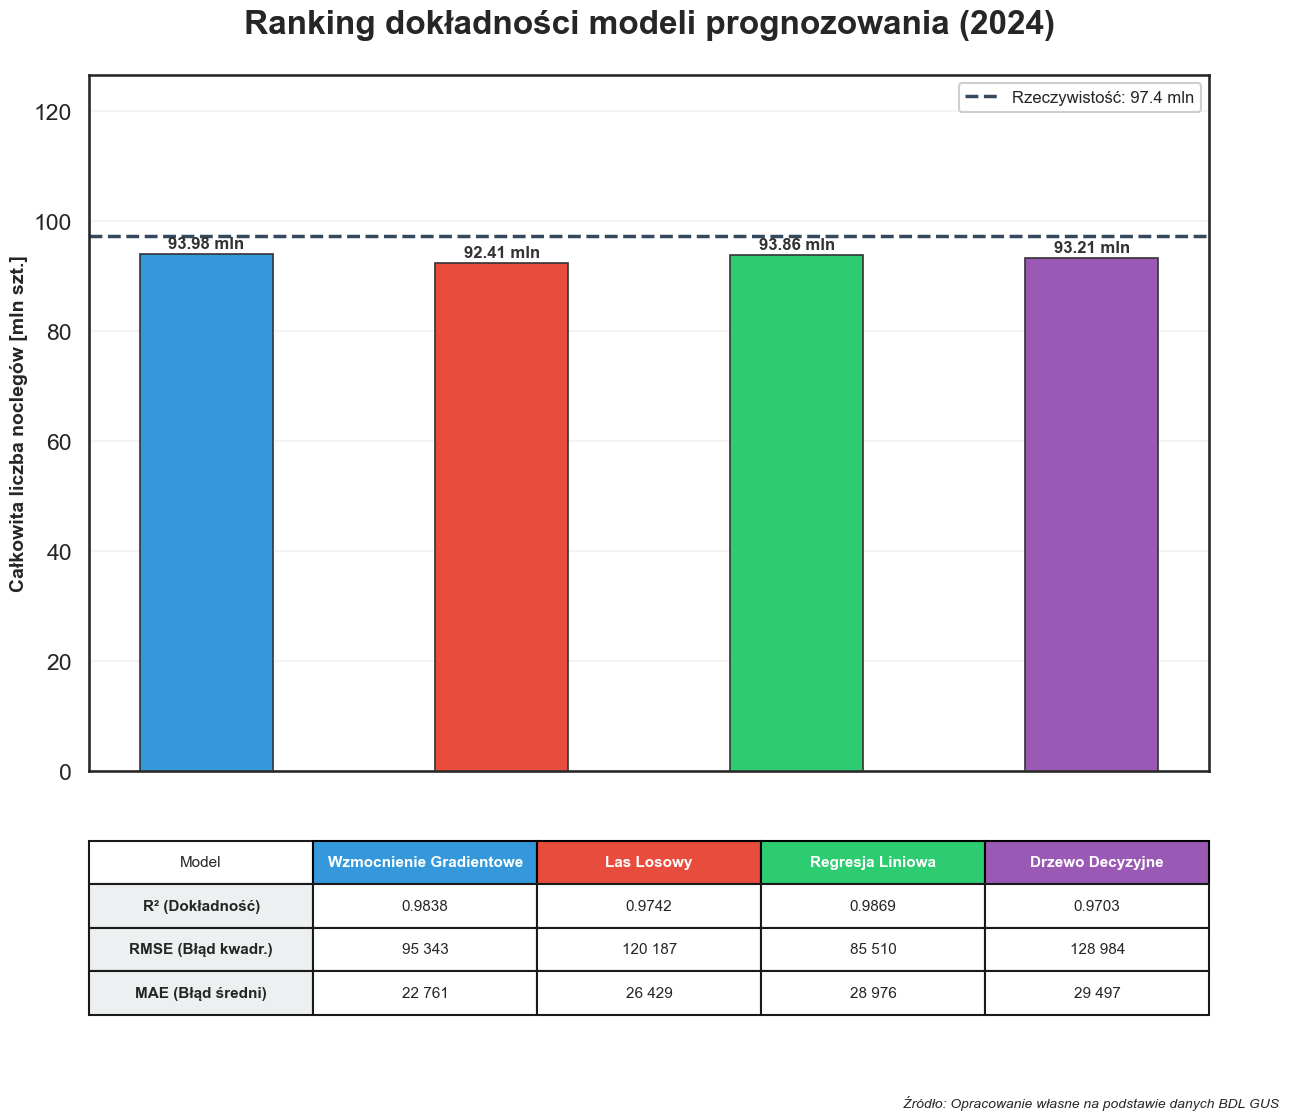


SUKCES! Wszystko zapisane w folderze: Final_Porownanie_Modeli_R2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# --- USTAWIENIA STYLU (PROFESJONALNY) ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. TWORZENIE FOLDERU NA WYNIKI
# To jest folder, gdzie zapisze się Twój wykres
output_folder = "Final_Porownanie_Modeli_R2"
os.makedirs(output_folder, exist_ok=True)
print(f"Utworzono folder na wyniki: {output_folder}")

# 2. KONFIGURACJA ŚCIEŻEK DO PLIKÓW
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", # Zwycięzca
        "path": r"Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv",
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#3498db" # Niebieski
    },
    {
        "name": "Las Losowy", 
        "path": r"Regresja Lasów Losowych\Wyniki_Walidacja_2024.csv",
        "filename": "Wyniki_Walidacja_2024.csv",
        "col_pred": "Prognoza", 
        "col_true": "Udzielone_Noclegi",
        "color": "#e74c3c" # Czerwony
    },
    {
        "name": "Regresja Liniowa", 
        "path": r"Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv",
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#2ecc71" # Zielony
    },
    {
        "name": "Drzewo Decyzyjne", 
        "path": r"Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv",
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", 
        "col_true": "Rzeczywiste_2024",
        "color": "#9b59b6" # Fioletowy
    }
]

results = []
real_sum_global = 0

print("\n--- ROZPOCZYNAM OBLICZANIE METRYK ---")

# 3. PĘTLA PRZETWARZANIA DANYCH
for m in models_config:
    # Szukamy pliku (w folderze lub bezpośrednio)
    file_path = m['path'] if os.path.exists(m['path']) else m['filename']
    
    if os.path.exists(file_path):
        try:
            # Wczytanie (separator ; lub ,)
            df = pd.read_csv(file_path, sep=';')
            if df.shape[1] < 2: df = pd.read_csv(file_path, sep=',')
            df.columns = df.columns.str.strip()
            
            if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                y_true = df[m['col_true']]
                y_pred = df[m['col_pred']]
                
                # --- OBLICZANIE METRYK ---
                total_sum = y_pred.sum()
                r2 = r2_score(y_true, y_pred)
                mae = mean_absolute_error(y_true, y_pred)
                mse = mean_squared_error(y_true, y_pred)
                rmse = np.sqrt(mse) # RMSE (Pierwiastek błędu kwadratowego)
                
                results.append({
                    "Model": m['name'],
                    "Suma": total_sum,
                    "R2": r2,
                    "MAE": mae,
                    "RMSE": rmse,
                    "Color": m['color']
                })
                
                if real_sum_global == 0:
                    real_sum_global = y_true.sum()
                
                print(f"Przeliczono: {m['name']:<25} | R2: {r2:.4f} | RMSE: {rmse:,.0f}")
            else:
                print(f"Brak kolumn w pliku: {file_path}")
        except Exception as e:
            print(f"Błąd pliku {file_path}: {e}")
    else:
        print(f"Nie znaleziono pliku: {file_path}")

# DataFrame z wynikami
df_res = pd.DataFrame(results)

# ZAPIS TABELI DO PLIKU
csv_path = os.path.join(output_folder, "Tabela_Metryk_Full.csv")
df_res.to_csv(csv_path, index=False, sep=';')
print(f"\nZapisano pełną tabelę z danymi: {csv_path}")


# =========================================================
# 4. TWORZENIE GRAFIKU (ZAPIS DO FOLDERU)
# =========================================================
if not df_res.empty:
    fig, ax = plt.subplots(figsize=(14, 12)) # Wyższy wykres dla tabeli

    # A. Słupki
    bars = ax.bar(
        df_res['Model'], 
        df_res['Suma'] / 1_000_000, 
        color=df_res['Color'], 
        edgecolor='#333333',
        linewidth=1.2,
        width=0.45,
        zorder=3
    )

    # B. Linia Rzeczywistości
    ax.axhline(
        y=real_sum_global/1_000_000, 
        color='#34495e', 
        linestyle='--', 
        linewidth=2.5, 
        label=f'Rzeczywistość: {real_sum_global/1_000_000:.1f} mln',
        zorder=2
    )

    # C. Podpisy wartości
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height + 0.5, 
            f'{height:.2f} mln', 
            ha='center', va='bottom', 
            fontweight='bold', fontsize=12, color='#333333'
        )

    # D. Formatowanie
    ax.set_title("Ranking dokładności modeli prognozowania (2024)", fontsize=24, fontweight='bold', pad=30)
    ax.set_ylabel("Całkowita liczba noclegów [mln szt.]", fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='-', alpha=0.2, zorder=0)
    
    # Skalowanie osi Y
    max_y = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    ax.set_ylim(0, max_y * 1.3)

    # E. TABELA POD WYKRESEM
    table_cols = ["Model"] + df_res['Model'].tolist()
    
    # Dane do tabeli
    row_r2 = ["R² (Dokładność)"] + [f"{x:.4f}" for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadr.)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]
    
    table_vals = [row_r2, row_rmse, row_mae]

    # Rysowanie tabeli
    the_table = plt.table(
        cellText=table_vals,
        colLabels=table_cols,
        loc='bottom',
        bbox=[0.0, -0.35, 1.0, 0.25],
        cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    # Kolory w tabeli
    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')
        
    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1')
        
    ax.set_xticks([]) 
    ax.legend(loc='upper right', frameon=True, fontsize=12, framealpha=0.95)
    plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')
    plt.subplots_adjust(left=0.1, bottom=0.3)

    # --- KLUCZOWY MOMENT: ZAPISYWANIE PLIKU ---
    plot_path = os.path.join(output_folder, "Wykres_Ranking_Modele.png")
    plt.savefig(plot_path, dpi=300) # Zapisuje przed pokazaniem
    print(f"Zapisano wykres w: {plot_path}")
    
    plt.show()

    print(f"\nSUKCES! Wszystko zapisane w folderze: {output_folder}")
else:
    print("BŁĄD: Nie wczytano danych. Sprawdź pliki.")


--- OBLICZANIE METRYK ---
Zapisano wykres z PRZERWANĄ OSIĄ: Final_Porownanie_Modeli_R2\Wykres_Ranking_BrokenAxis.png


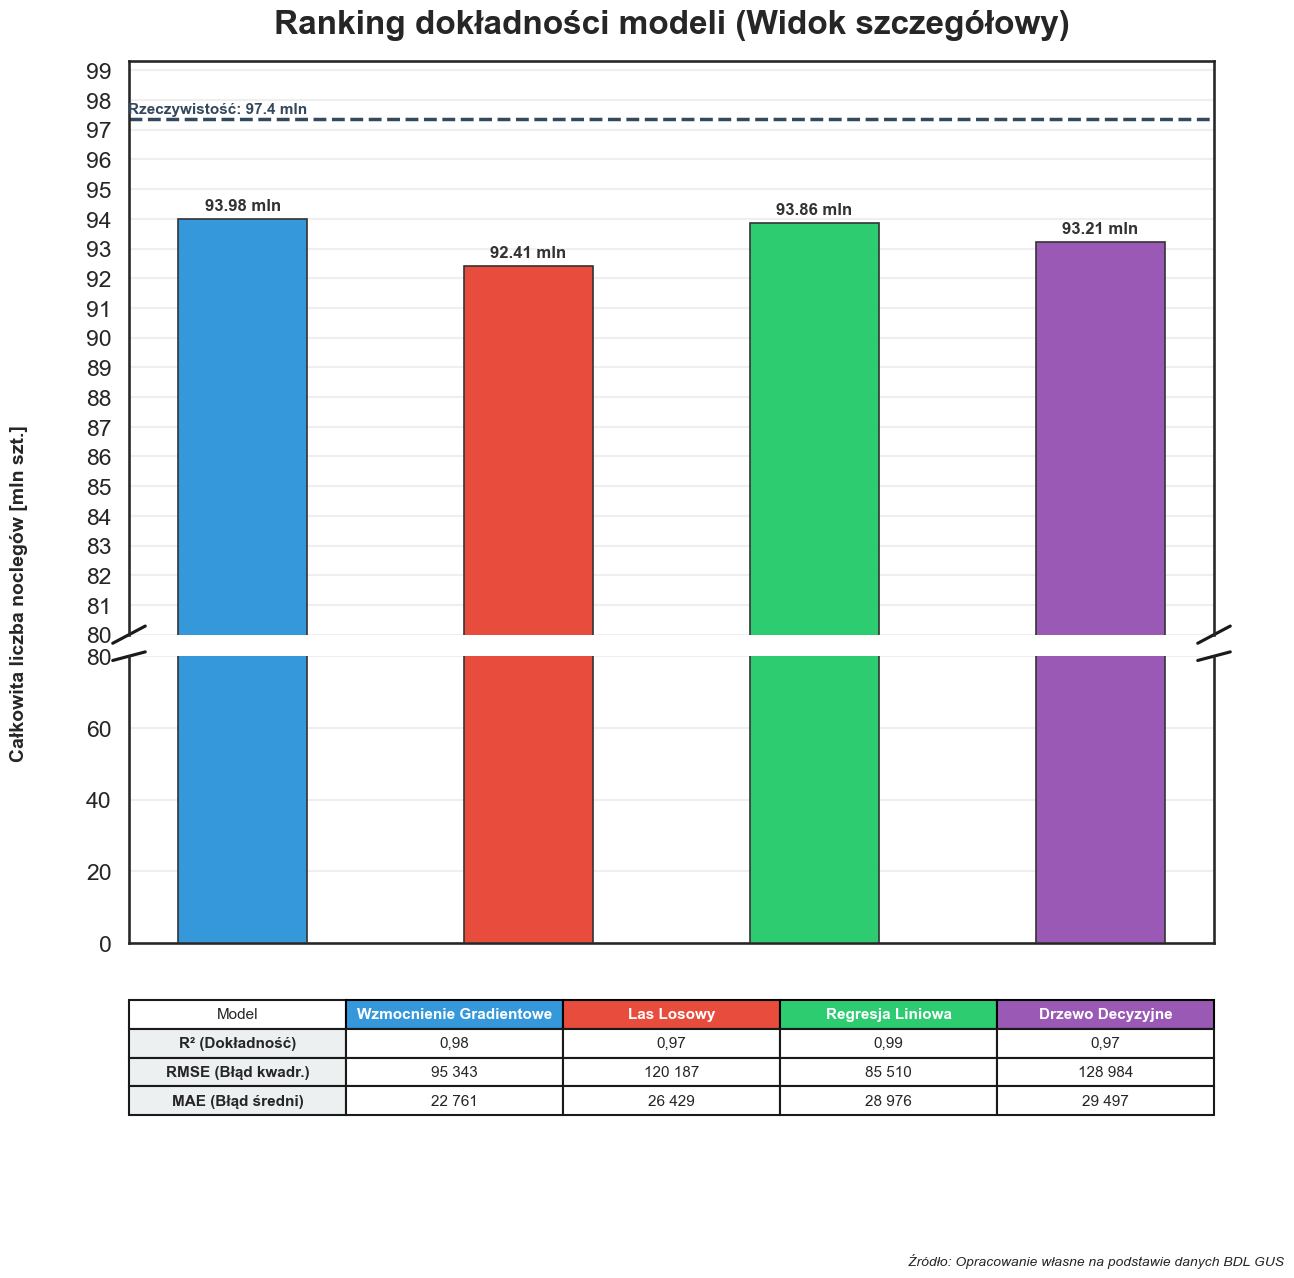


SUKCES! Wykres ma skalę 0-20-40-60-80 na dole ORAZ 81-82-83... na górze.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os
import matplotlib.ticker as ticker

# --- USTAWIENIA STYLU ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. FOLDER NA WYNIKI
output_folder = "Final_Porownanie_Modeli_R2"
os.makedirs(output_folder, exist_ok=True)

# 2. KONFIGURACJA ŚCIEŻEK
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", 
        "path": r"Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv",
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", "col_true": "Rzeczywiste_2024", "color": "#3498db"
    },
    {
        "name": "Las Losowy", 
        "path": r"Regresja Lasów Losowych\Wyniki_Walidacja_2024.csv",
        "filename": "Wyniki_Walidacja_2024.csv",
        "col_pred": "Prognoza", "col_true": "Udzielone_Noclegi", "color": "#e74c3c"
    },
    {
        "name": "Regresja Liniowa", 
        "path": r"Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv",
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", "col_true": "Rzeczywiste_2024", "color": "#2ecc71"
    },
    {
        "name": "Drzewo Decyzyjne", 
        "path": r"Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv",
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", "col_true": "Rzeczywiste_2024", "color": "#9b59b6"
    }
]

results = []
real_sum_global = 0

print("\n--- OBLICZANIE METRYK ---")

for m in models_config:
    file_path = m['path'] if os.path.exists(m['path']) else m['filename']
    
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, sep=';')
            if df.shape[1] < 2: df = pd.read_csv(file_path, sep=',')
            df.columns = df.columns.str.strip()
            
            if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                y_true = df[m['col_true']]
                y_pred = df[m['col_pred']]
                
                total_sum = y_pred.sum()
                r2 = r2_score(y_true, y_pred)
                mae = mean_absolute_error(y_true, y_pred)
                mse = mean_squared_error(y_true, y_pred)
                rmse = np.sqrt(mse)
                
                results.append({
                    "Model": m['name'],
                    "Suma": total_sum,
                    "R2": r2,
                    "MAE": mae,
                    "RMSE": rmse,
                    "Color": m['color']
                })
                
                if real_sum_global == 0: real_sum_global = y_true.sum()
        except:
            pass

df_res = pd.DataFrame(results)

# =========================================================
# TWORZENIE GRAFIKU Z ROZRYWEM OSI (BROKEN AXIS)
# =========================================================
if not df_res.empty:
    # Tworzymy 2 podwykresy: Górny (szczegółowy) i Dolny (ogólny)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 14), 
                                   gridspec_kw={'height_ratios': [2, 1]}) # Górny jest 2x wyższy
    
    plt.subplots_adjust(hspace=0.05)  # Zmniejszamy odstęp między nimi

    # --- RYSOWANIE SŁUPKÓW NA OBU WYKRESACH ---
    for ax in (ax1, ax2):
        bars = ax.bar(
            df_res['Model'], 
            df_res['Suma'] / 1_000_000, 
            color=df_res['Color'], 
            edgecolor='#333333', linewidth=1.2, width=0.45, zorder=3
        )
        
        # Linia rzeczywistości
        ax.axhline(
            y=real_sum_global/1_000_000, 
            color='#34495e', linestyle='--', linewidth=2.5, zorder=2
        )
        
        ax.grid(axis='y', linestyle='-', alpha=0.3, zorder=0)

    # --- KONFIGURACJA GÓRNEGO WYKRESU (SZCZEGÓŁY OD 80 DO KONCA) ---
    max_val = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    ax1.set_ylim(80, max_val * 1.02)  # Zakres od 80 do góry
    
    # Podziałka co 1 milion (KONKRETYKA: 81, 82, 83...)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(1)) 
    
    # Tytuł tylko na górze
    ax1.set_title("Ranking dokładności modeli (Widok szczegółowy)", fontsize=24, fontweight='bold', pad=20)
    
    # Ukrywamy dolną ramkę górnego wykresu
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # --- KONFIGURACJA DOLNEGO WYKRESU (OGÓŁY 0-80) ---
    ax2.set_ylim(0, 80) # Zakres od 0 do 80
    
    # Podziałka co 20 milionów (KONTEKST: 20, 40, 60, 80)
    ax2.set_yticks([0, 20, 40, 60, 80])
    
    # Ukrywamy górną ramkę dolnego wykresu
    ax2.spines['top'].set_visible(False)
    
    # Wspólna etykieta Y (ustawiamy ręcznie pośrodku)
    fig.text(0.04, 0.5, "Całkowita liczba noclegów [mln szt.]", va='center', rotation='vertical', fontsize=14, fontweight='bold')

    # --- EFEKT ROZDARTEJ OSI (Dukośne linie) ---
    d = .015  # Rozmiar ukośnych linii
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    
    # Linie na górnym wykresie (dół)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # lewa-dół
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # prawa-dół

    kwargs.update(transform=ax2.transAxes)  # Przełączamy na dolny wykres
    
    # Linie na dolnym wykresie (góra)
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # lewa-góra
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # prawa-góra

    # --- PODPISY WARTOŚCI (Tylko na górnym, bo tam są wierzchołki) ---
    for bar in bars: # Bierzemy bars z ostatniej pętli (ax2), ale pozycje są te same
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2, height + 0.2, 
            f'{height:.2f} mln', ha='center', va='bottom', fontweight='bold', fontsize=12, color='#333333'
        )
    
    # Podpis linii rzeczywistości (na górnym wykresie)
    ax1.text(
        -0.4, (real_sum_global/1_000_000) + 0.2, 
        f'Rzeczywistość: {real_sum_global/1_000_000:.1f} mln', 
        color='#34495e', fontweight='bold', fontsize=11
    )

    # --- TABELA POD WYKRESEM ---
    table_cols = ["Model"] + df_res['Model'].tolist()
    row_r2 = ["R² (Dokładność)"] + [f"{x:.2f}".replace(".", ",") for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadr.)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]
    
    table_vals = [row_r2, row_rmse, row_mae]

    the_table = plt.table(
        cellText=table_vals, colLabels=table_cols, loc='bottom',
        bbox=[0.0, -0.6, 1.0, 0.4], # Tabela pod dolnym wykresem
        cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')
        
    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1')

    # Ukrycie osi X na dolnym wykresie
    ax2.set_xticks([]) 
    
    # Legenda (tylko raz, np. na górnym)
    # ax1.legend(...) - W tym przypadku kolory i tabela mówią wszystko, ale można dodać
    
    plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')
    plt.subplots_adjust(bottom=0.25)

    plot_path = os.path.join(output_folder, "Wykres_Ranking_BrokenAxis.png")
    plt.savefig(plot_path, dpi=300)
    print(f"Zapisano wykres z PRZERWANĄ OSIĄ: {plot_path}")
    plt.show()

    print(f"\nSUKCES! Wykres ma skalę 0-20-40-60-80 na dole ORAZ 81-82-83... na górze.")
else:
    print("BŁĄD: Brak danych.")


--- OBLICZANIE METRYK ---
Zapisano wykres (SUCEOLNE SŁUPKI): Final_Porownanie_Modeli_R2\Wykres_Ranking_FULL_BARS.png


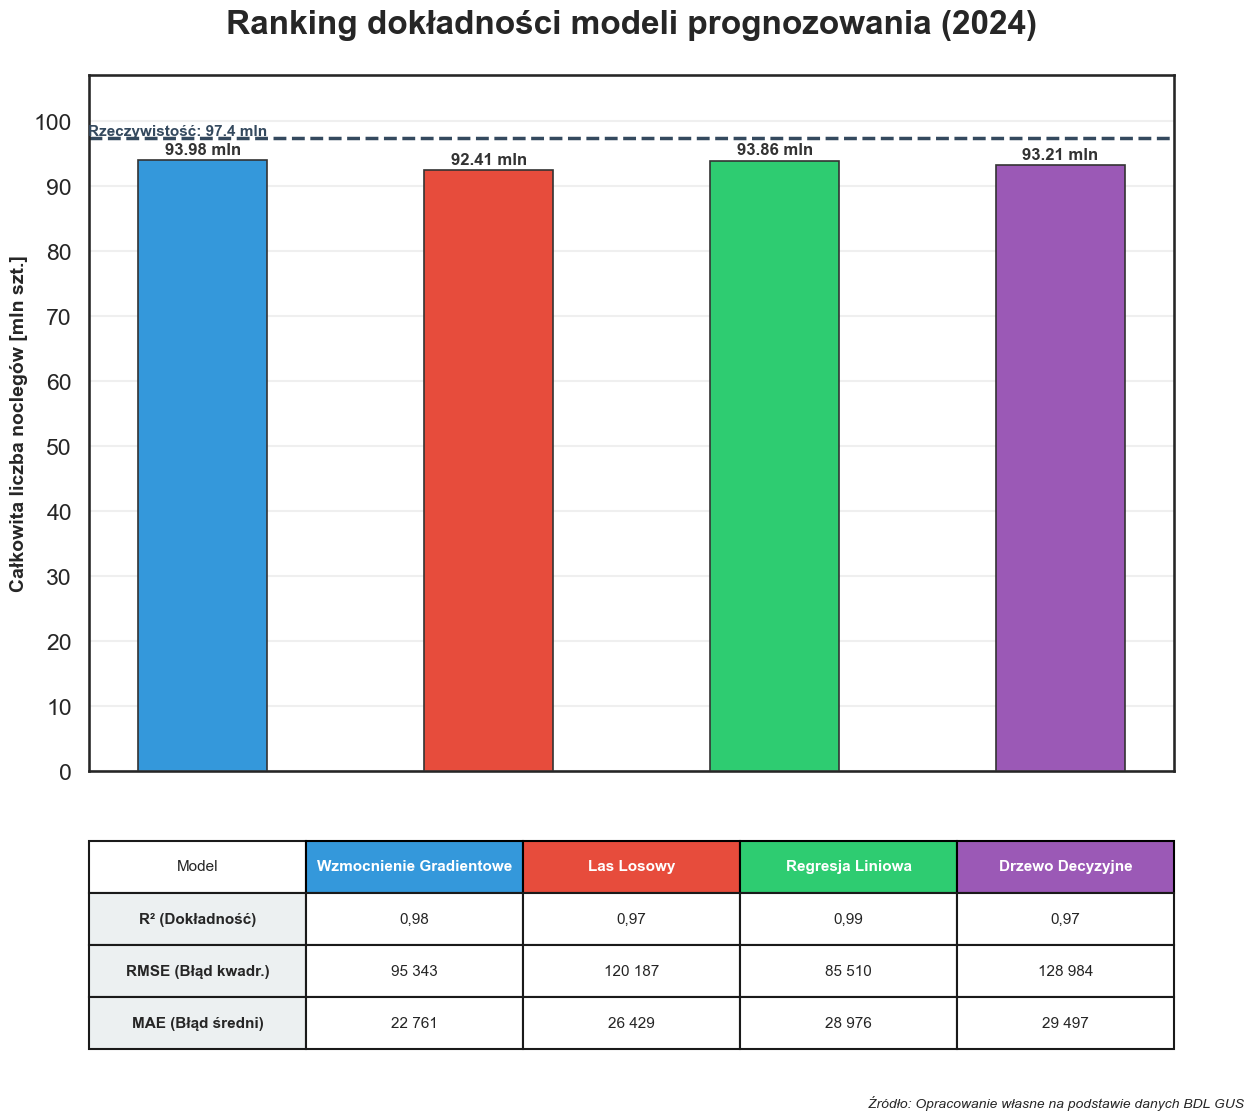


SUKCES! Wykres jest ciągły od 0.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os
import matplotlib.ticker as ticker

# --- USTAWIENIA STYLU ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. FOLDER NA WYNIKI
output_folder = "Final_Porownanie_Modeli_R2"
os.makedirs(output_folder, exist_ok=True)

# 2. KONFIGURACJA ŚCIEŻEK
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", 
        "path": r"Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv",
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", "col_true": "Rzeczywiste_2024", "color": "#3498db"
    },
    {
        "name": "Las Losowy", 
        "path": r"Regresja Lasów Losowych\Wyniki_Walidacja_2024.csv",
        "filename": "Wyniki_Walidacja_2024.csv",
        "col_pred": "Prognoza", "col_true": "Udzielone_Noclegi", "color": "#e74c3c"
    },
    {
        "name": "Regresja Liniowa", 
        "path": r"Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv",
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", "col_true": "Rzeczywiste_2024", "color": "#2ecc71"
    },
    {
        "name": "Drzewo Decyzyjne", 
        "path": r"Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv",
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", "col_true": "Rzeczywiste_2024", "color": "#9b59b6"
    }
]

results = []
real_sum_global = 0

print("\n--- OBLICZANIE METRYK ---")

for m in models_config:
    file_path = m['path'] if os.path.exists(m['path']) else m['filename']
    
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, sep=';')
            if df.shape[1] < 2: df = pd.read_csv(file_path, sep=',')
            df.columns = df.columns.str.strip()
            
            if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                y_true = df[m['col_true']]
                y_pred = df[m['col_pred']]
                
                total_sum = y_pred.sum()
                r2 = r2_score(y_true, y_pred)
                mae = mean_absolute_error(y_true, y_pred)
                mse = mean_squared_error(y_true, y_pred)
                rmse = np.sqrt(mse)
                
                results.append({
                    "Model": m['name'],
                    "Suma": total_sum,
                    "R2": r2,
                    "MAE": mae,
                    "RMSE": rmse,
                    "Color": m['color']
                })
                
                if real_sum_global == 0: real_sum_global = y_true.sum()
        except:
            pass

df_res = pd.DataFrame(results)

# =========================================================
# TWORZENIE JEDNEGO WYKRESU (BEZ ROZERWANEJ OSI - SUCEOLNE SŁUPKI)
# =========================================================
if not df_res.empty:

    fig, ax = plt.subplots(figsize=(14, 12)) # Nieco wyższy dla czytelności

    # --- RYSOWANIE SŁUPKÓW (OD ZERA) ---
    bars = ax.bar(
        df_res['Model'], 
        df_res['Suma'] / 1_000_000, 
        color=df_res['Color'], 
        edgecolor='#333333', linewidth=1.2, width=0.45, zorder=3
    )

    # Linia rzeczywistości
    ax.axhline(
        y=real_sum_global / 1_000_000, 
        color='#34495e', linestyle='--', linewidth=2.5, zorder=2
    )

    ax.grid(axis='y', linestyle='-', alpha=0.3, zorder=0)

    # --- ZAKRES I PODZIAŁKA ---
    # Obliczamy max
    max_val = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    
    # 1. Startujemy od 0 (SUCEOLNE SŁUPKI)
    ax.set_ylim(0, max_val * 1.1)

    # 2. Ustawiamy podziałkę co 10 milionów. 
    # To daje nam 0, 10, 20... 80, 90. Jest czytelnie i widać skalę.
    # Ustawienie co 1 (81, 82) przy skali 0-100 jest niemożliwe bez nakładania się tekstu.
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) 

    # --- TYTUŁ ---
    ax.set_title(
        "Ranking dokładności modeli prognozowania (2024)",
        fontsize=24, fontweight='bold', pad=30
    )

    # --- ETYKIETA Y ---
    ax.set_ylabel(
        "Całkowita liczba noclegów [mln szt.]",
        fontsize=14, fontweight='bold'
    )

    # --- PODPISY WARTOŚCI (To tu widać dokładną różnicę!) ---
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f'{height:.2f} mln',
            ha='center', va='bottom',
            fontweight='bold', fontsize=12, color='#333333'
        )

    # Podpis linii rzeczywistości
    ax.text(
        -0.4,
        (real_sum_global / 1_000_000) + 0.5,
        f'Rzeczywistość: {real_sum_global / 1_000_000:.1f} mln',
        color='#34495e',
        fontweight='bold',
        fontsize=11
    )

    # --- TABELA NA DOLE ---
    table_cols = ["Model"] + df_res['Model'].tolist()
    row_r2 = ["R² (Dokładność)"] + [f"{x:.2f}".replace(".", ",") for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadr.)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]

    table_vals = [row_r2, row_rmse, row_mae]

    the_table = plt.table(
        cellText=table_vals,
        colLabels=table_cols,
        loc='bottom',
        bbox=[0.0, -0.4, 1.0, 0.3],
        cellLoc='center'
    )

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    # Kolory w tabeli
    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')

    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1')

    # Ukrycie osi X (bo jest tabela)
    ax.set_xticks([]) 
    
    plt.figtext(
        0.95, 0.02,
        "Źródło: Opracowanie własne na podstawie danych BDL GUS",
        ha="right", fontsize=10, style='italic'
    )

    plt.subplots_adjust(bottom=0.3)

    # Zapis
    plot_path = os.path.join(output_folder, "Wykres_Ranking_FULL_BARS.png")
    plt.savefig(plot_path, dpi=300)
    print(f"Zapisano wykres (SUCEOLNE SŁUPKI): {plot_path}")
    plt.show()
    
    print("\nSUKCES! Wykres jest ciągły od 0.")

else:
    print("BŁĄD: Brak danych do wykresu.")

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# --- USTAWIENIA STYLU ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. FOLDER NA WYNIKI
output_folder = "Final_Porownanie_Modeli_R2"
os.makedirs(output_folder, exist_ok=True)

# 2. KONFIGURACJA DANYCH
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", 
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", "col_true": "Rzeczywiste_2024", "color": "#3498db"
    },
    {
        "name": "Las Losowy", 
        "filename": "Wyniki_Walidacja_2024.csv",
        "col_pred": "Prognoza", "col_true": "Udzielone_Noclegi", "color": "#e74c3c"
    },
    {
        "name": "Regresja Liniowa", 
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", "col_true": "Rzeczywiste_2024", "color": "#2ecc71"
    },
    {
        "name": "Drzewo Decyzyjne", 
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", "col_true": "Rzeczywiste_2024", "color": "#9b59b6"
    }
]

results = []
real_sum_global = 0

# 3. OBLICZENIA
for m in models_config:
    if os.path.exists(m['filename']):
        try:
            df = pd.read_csv(m['filename'], sep=';')
            if df.shape[1] < 2: df = pd.read_csv(m['filename'], sep=',')
            df.columns = df.columns.str.strip()
            
            if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                y_true = df[m['col_true']]
                y_pred = df[m['col_pred']]
                
                total_sum = y_pred.sum()
                r2 = r2_score(y_true, y_pred)
                mae = mean_absolute_error(y_true, y_pred)
                mse = mean_squared_error(y_true, y_pred)
                rmse = np.sqrt(mse)
                
                results.append({
                    "Model": m['name'],
                    "Suma": total_sum,
                    "R2": r2,
                    "MAE": mae,
                    "RMSE": rmse,
                    "Color": m['color']
                })
                
                if real_sum_global == 0: real_sum_global = y_true.sum()
        except:
            pass

df_res = pd.DataFrame(results)

# 4. TWORZENIE WYKRESU "ZOOM" BEZ PRZERW
if not df_res.empty:
    # height_ratios=[2, 1] -> Górna część (detale) zajmuje 2/3, dolna (baza) 1/3 wysokości
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 14), 
                                   gridspec_kw={'height_ratios': [2, 1]})
    
    # --- KLUCZOWY MOMENT: HSPACE=0 (BRAK PRZERWY) ---
    plt.subplots_adjust(hspace=0) 

    # --- RYSOWANIE DANYCH ---
    for ax in (ax1, ax2):
        bars = ax.bar(
            df_res['Model'], 
            df_res['Suma'] / 1_000_000, 
            color=df_res['Color'], 
            edgecolor='#333333', linewidth=1.2, width=0.45, zorder=3
        )
        # Linia rzeczywistości
        ax.axhline(
            y=real_sum_global/1_000_000, 
            color='#34495e', linestyle='--', linewidth=2.5, zorder=2
        )
        ax.grid(axis='y', linestyle='-', alpha=0.3, zorder=0)

    # --- GÓRA (Szczegóły: 80 - MAX) ---
    max_val = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    ax1.set_ylim(80, max_val * 1.02)
    
    # Skala co 1 (80, 81, 82...)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    # Tytuł
    ax1.set_title("Ranking dokładności modeli (Skala zmienna)", fontsize=24, fontweight='bold', pad=20)

    # Podpisy wartości (Tylko na górnym)
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2, height + 0.1, 
            f'{height:.2f} mln', ha='center', va='bottom', fontweight='bold', fontsize=12, color='#333333'
        )
    
    # Podpis linii rzeczywistości
    ax1.text(
        -0.45, (real_sum_global/1_000_000) + 0.1, 
        f'Rzeczywistość: {real_sum_global/1_000_000:.1f} mln', 
        color='#34495e', fontweight='bold', fontsize=11
    )

    # --- DÓŁ (Baza: 0 - 80) ---
    ax2.set_ylim(0, 80)
    # Skala co 20 (0, 20, 40, 60) - UWAGA: Nie dajemy 80, żeby się nie zlało z górą
    ax2.set_yticks([0, 20, 40, 60])
    
    # Wspólna etykieta Y
    fig.text(0.04, 0.5, "Całkowita liczba noclegów [mln szt.]", va='center', rotation='vertical', fontsize=14, fontweight='bold')

    # --- TABELA POD WYKRESEM ---
    table_cols = ["Model"] + df_res['Model'].tolist()
    row_r2 = ["R² (Dokładność)"] + [f"{x:.2f}".replace(".", ",") for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadr.)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]
    table_vals = [row_r2, row_rmse, row_mae]

    the_table = plt.table(
        cellText=table_vals, colLabels=table_cols, loc='bottom',
        bbox=[0.0, -0.6, 1.0, 0.45], # Pozycja tabeli
        cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')
        
    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1')

    # Ukrycie osi X
    ax2.set_xticks([]) 
    
    # Źródło
    plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')
    
    # Margines dolny
    plt.subplots_adjust(bottom=0.25)

    plot_path = os.path.join(output_folder, "Wykres_Ranking_Caly_Zmienny.png")
    plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"\nSUKCES! Wykres wygląda jak jedna całość. Dół co 20, góra co 1.")
else:
    print("BŁĄD: Brak danych.")

BŁĄD: Brak danych.


--- DIAGNOSTYKA PLIKÓW ---
[OK] Wczytano: Wzmocnienie Gradientowe (z pliku Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv)
[BRAK] Nie znaleziono pliku dla: Las Losowy
[OK] Wczytano: Regresja Liniowa (z pliku Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv)
[OK] Wczytano: Drzewo Decyzyjne (z pliku Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv)


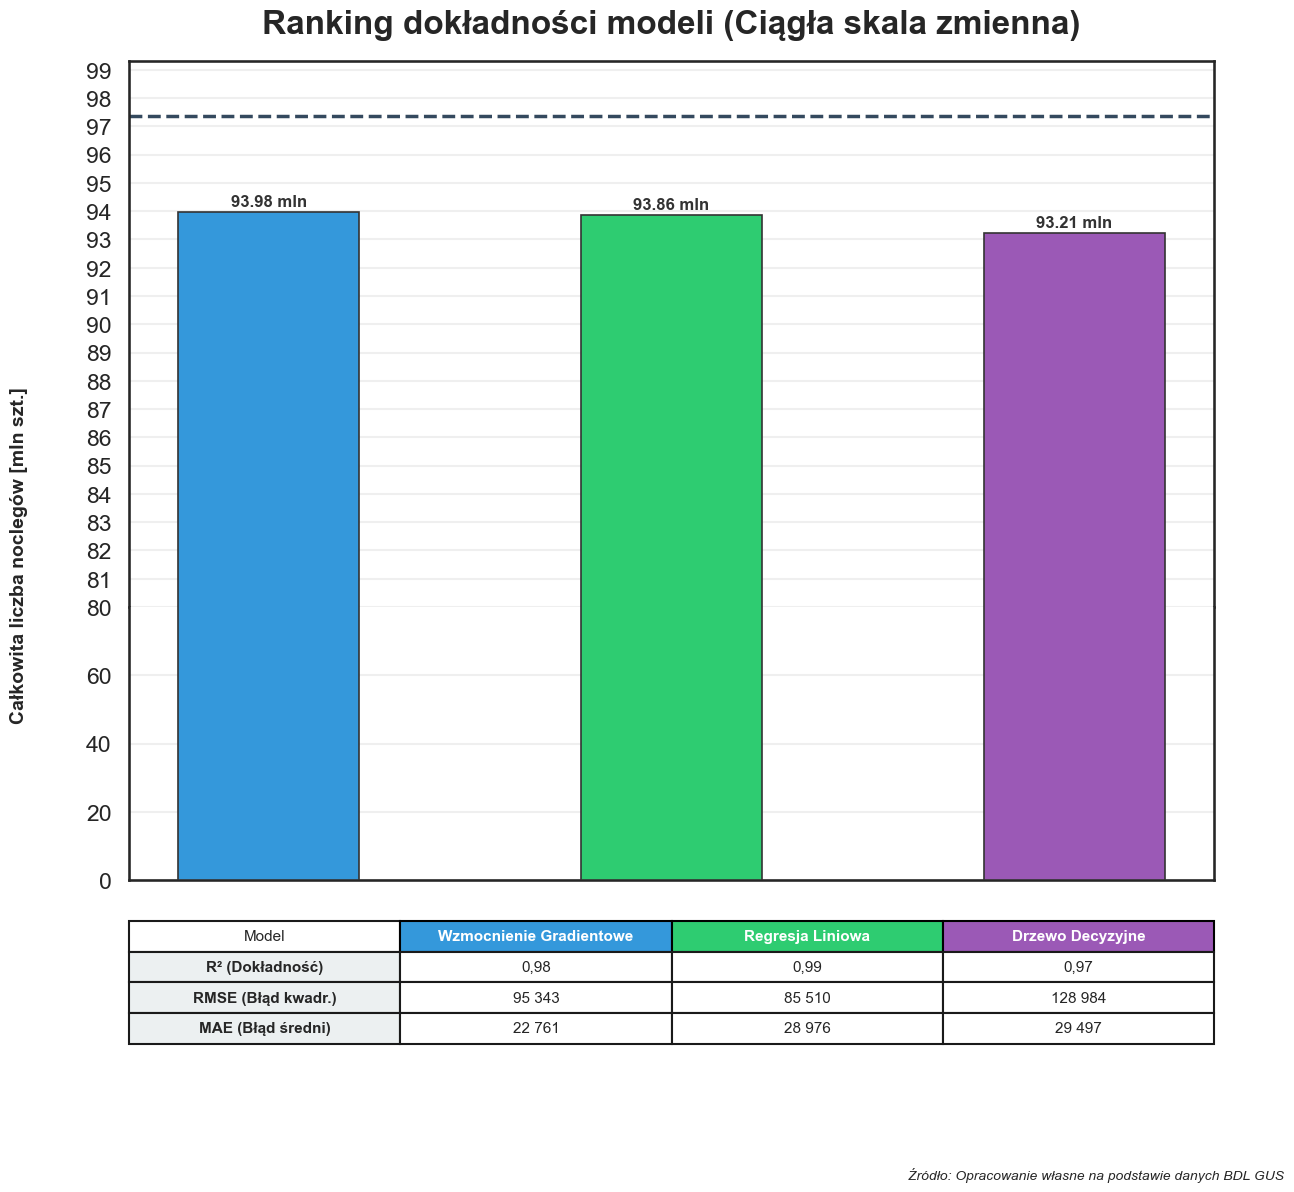

Gotowe! Wykres zapisany w: Final_Porownanie_Modeli_R2/Wykres_Ranking_Caly_Bez_Przerw.png


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# --- USTAWIENIA STYLU ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. KONFIGURACJA PLIKÓW (Sprawdź czy masz te pliki!)
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", 
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", "col_true": "Rzeczywiste_2024", "color": "#3498db"
    },
    {
        "name": "Las Losowy", 
        "filename": "Wyniki_Walidacja_2024.csv",
        "col_pred": "Prognoza", "col_true": "Udzielone_Noclegi", "color": "#e74c3c"
    },
    {
        "name": "Regresja Liniowa", 
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", "col_true": "Rzeczywiste_2024", "color": "#2ecc71"
    },
    {
        "name": "Drzewo Decyzyjne", 
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", "col_true": "Rzeczywiste_2024", "color": "#9b59b6"
    }
]

# 2. WCZYTYWANIE DANYCH
results = []
real_sum_global = 0
found_files = 0

print("--- DIAGNOSTYKA PLIKÓW ---")
for m in models_config:
    # Szukamy pliku w bieżącym katalogu lub podfolderach
    paths_to_check = [
        m['filename'], 
        os.path.join(f"Wyniki_{m['name'].replace(' ', '_')}", m['filename']),
        os.path.join(f"Regresja_{m['name'].replace(' ', '_')}", m['filename'])
    ]
    
    loaded = False
    for path in paths_to_check:
        if os.path.exists(path):
            try:
                df = pd.read_csv(path, sep=';')
                if df.shape[1] < 2: df = pd.read_csv(path, sep=',')
                df.columns = df.columns.str.strip()
                
                if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                    y_true = df[m['col_true']]
                    y_pred = df[m['col_pred']]
                    
                    results.append({
                        "Model": m['name'],
                        "Suma": y_pred.sum(),
                        "R2": r2_score(y_true, y_pred),
                        "MAE": mean_absolute_error(y_true, y_pred),
                        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
                        "Color": m['color']
                    })
                    if real_sum_global == 0: real_sum_global = y_true.sum()
                    print(f"[OK] Wczytano: {m['name']} (z pliku {path})")
                    loaded = True
                    found_files += 1
                    break
            except Exception as e:
                print(f"[BŁĄD] Plik {path} uszkodzony: {e}")
    
    if not loaded:
        print(f"[BRAK] Nie znaleziono pliku dla: {m['name']}")

df_res = pd.DataFrame(results)

# 3. TWORZENIE WYKRESU (SUCIEŁNY Z PODWÓJNĄ SKALĄ)
if not df_res.empty:
    # Dzielimy wykres na 2 części: Górna (szczegółowa) i Dolna (baza)
    # hspace=0 SKLEJA WYKRESY W JEDEN
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 13), 
                                   gridspec_kw={'height_ratios': [2, 1], 'hspace': 0})

    # Rysujemy to samo na obu połówkach
    for ax in (ax1, ax2):
        bars = ax.bar(
            df_res['Model'], df_res['Suma'] / 1_000_000, 
            color=df_res['Color'], edgecolor='#333333', linewidth=1.2, width=0.45, zorder=3
        )
        ax.axhline(y=real_sum_global/1_000_000, color='#34495e', linestyle='--', linewidth=2.5, zorder=2)
        ax.grid(axis='y', linestyle='-', alpha=0.3, zorder=0)

    # --- CZĘŚĆ GÓRNA (Szczegóły: 80 - MAX) ---
    max_val = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    ax1.set_ylim(80, max_val * 1.02)
    
    # Podziałka co 1 milion (80, 81, 82...) - TO JEST TA KONKRETYKA
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    # Ukrywamy dolną krawędź górnego wykresu (żeby nie było linii podziału)
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(axis='x', length=0) # Ukrywamy "ząbki" na osi X

    # Podpisy wartości (tylko na górze)
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2, height + 0.1, 
            f'{height:.2f} mln', ha='center', va='bottom', fontweight='bold', fontsize=12, color='#333333'
        )

    # Tytuł
    ax1.set_title("Ranking dokładności modeli (Ciągła skala zmienna)", fontsize=24, fontweight='bold', pad=20)

    # --- CZĘŚĆ DOLNA (Baza: 0 - 80) ---
    ax2.set_ylim(0, 80)
    
    # Podziałka co 20 milionów (0, 20, 40, 60) - UWAGA: Bez 80, żeby się nie dublowało
    ax2.set_yticks([0, 20, 40, 60])
    
    # Ukrywamy górną krawędź dolnego wykresu
    ax2.spines['top'].set_visible(False)

    # Wspólna etykieta Y
    fig.text(0.04, 0.5, "Całkowita liczba noclegów [mln szt.]", va='center', rotation='vertical', fontsize=14, fontweight='bold')

    # --- TABELA POD WYKRESEM ---
    table_cols = ["Model"] + df_res['Model'].tolist()
    row_r2 = ["R² (Dokładność)"] + [f"{x:.2f}".replace(".", ",") for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadr.)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]
    table_vals = [row_r2, row_rmse, row_mae]

    the_table = plt.table(
        cellText=table_vals, colLabels=table_cols, loc='bottom',
        bbox=[0.0, -0.6, 1.0, 0.45], cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    # Kolorowanie tabeli
    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')
        
    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1')

    ax2.set_xticks([]) # Ukrywamy podpisy X na dole (bo jest tabela)
    
    # Źródło
    plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')
    plt.subplots_adjust(bottom=0.25)

    # Zapis
    os.makedirs("Final_Porownanie_Modeli_R2", exist_ok=True)
    save_path = "Final_Porownanie_Modeli_R2/Wykres_Ranking_Caly_Bez_Przerw.png"
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"Gotowe! Wykres zapisany w: {save_path}")

else:
    print("\nBŁĄD: Brak danych do wyświetlenia wykresu.")
    print(f"Sprawdź czy w folderze '{os.getcwd()}' znajdują się pliki CSV.")

--- ROZPOCZYNAM POSZUKIWANIE PLIKÓW ---
[SUKCES] Znaleziono 'Wzmocnienie Gradientowe' w: Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv
[SUKCES] Znaleziono 'Las Losowy' w: Regresja Lasów Losowych\Wyniki_Walidacja_2024.csv
[SUKCES] Znaleziono 'Regresja Liniowa' w: Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv
[SUKCES] Znaleziono 'Drzewo Decyzyjne' w: Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv


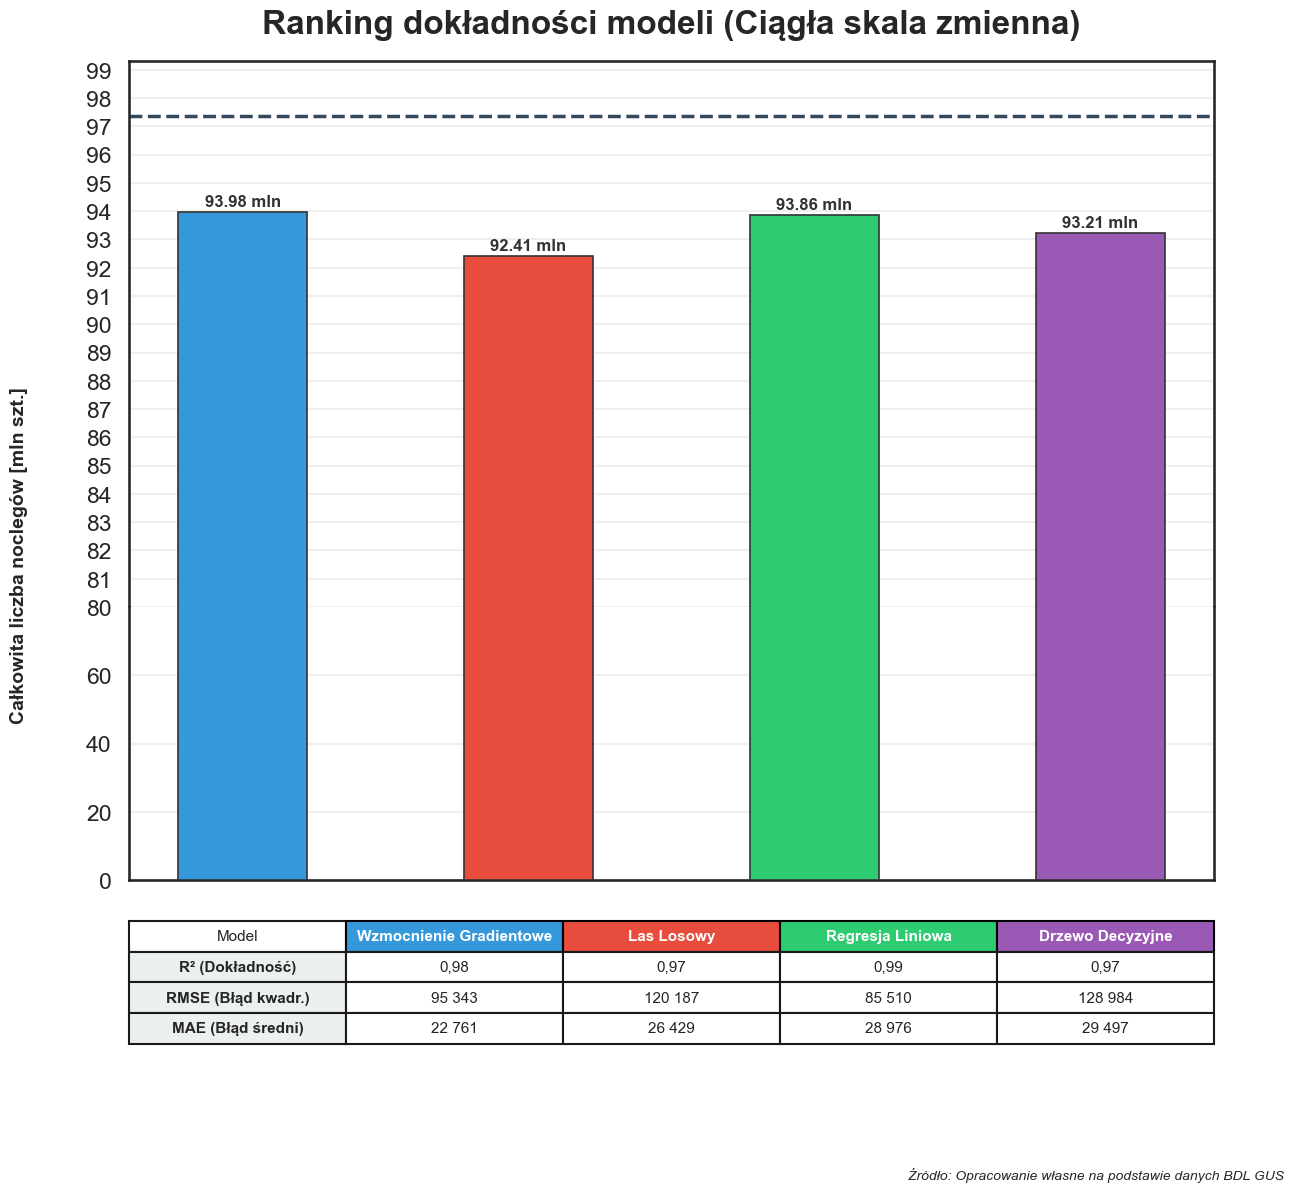

Gotowe! Wykres zapisany w: Final_Porownanie_Modeli_R2/Wykres_Finalny_Bez_Bledow.png


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# --- USTAWIENIA STYLU ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. KONFIGURACJA PLIKÓW
# Tutaj definiujemy, jakich plików szukamy
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", 
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", "col_true": "Rzeczywiste_2024", "color": "#3498db"
    },
    {
        "name": "Las Losowy", 
        # Ten plik często sprawia problem, więc dodamy mu więcej opcji szukania
        "filename": "Wyniki_Walidacja_2024.csv", 
        "col_pred": "Prognoza", "col_true": "Udzielone_Noclegi", "color": "#e74c3c"
    },
    {
        "name": "Regresja Liniowa", 
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", "col_true": "Rzeczywiste_2024", "color": "#2ecc71"
    },
    {
        "name": "Drzewo Decyzyjne", 
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", "col_true": "Rzeczywiste_2024", "color": "#9b59b6"
    }
]

# 2. INTELIGENTNE WCZYTYWANIE DANYCH
results = []
real_sum_global = 0

print("--- ROZPOCZYNAM POSZUKIWANIE PLIKÓW ---")

for m in models_config:
    # Lista miejsc, gdzie kod będzie szukał pliku
    possible_paths = [
        m['filename'],                                      # 1. W tym samym folderze (najważniejsze!)
        os.path.join("Regresja Lasów Losowych", m['filename']), # 2. W folderze Lasu
        os.path.join("Wyniki_Wzmocnienie_Gradientowe", m['filename']),
        os.path.join("Wyniki_Regresja_Liniowa", m['filename']),
        os.path.join("Wyniki_Drzewo_Decyzyjne", m['filename']),
        # Ewentualnie pełna ścieżka (jeśli masz specyficzną strukturę)
        r"C:\Nazar Haievskyj\Dane w" + "\\" + m['filename'] 
    ]
    
    file_loaded = False
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                # Próba wczytania (średnik lub przecinek)
                df = pd.read_csv(path, sep=';')
                if df.shape[1] < 2: df = pd.read_csv(path, sep=',')
                df.columns = df.columns.str.strip()
                
                # Sprawdzenie czy są kolumny
                if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                    y_true = df[m['col_true']]
                    y_pred = df[m['col_pred']]
                    
                    results.append({
                        "Model": m['name'],
                        "Suma": y_pred.sum(),
                        "R2": r2_score(y_true, y_pred),
                        "MAE": mean_absolute_error(y_true, y_pred),
                        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
                        "Color": m['color']
                    })
                    
                    if real_sum_global == 0: real_sum_global = y_true.sum()
                    print(f"[SUKCES] Znaleziono '{m['name']}' w: {path}")
                    file_loaded = True
                    break # Przerywamy pętlę szukania dla tego modelu, bo znaleźliśmy
            except Exception as e:
                print(f"[BŁĄD PLIKU] {path}: {e}")
    
    if not file_loaded:
        print(f"[UWAGA] Nie udało się znaleźć pliku dla: {m['name']} (Szukano w: {possible_paths[0]} i innych)")

df_res = pd.DataFrame(results)

# 3. TWORZENIE WYKRESU (IDEALNIE CIĄGŁY)
if not df_res.empty:
    # Ustawienie: góra 2x wyższa niż dół, hspace=0 (brak przerwy!)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 13), 
                                   gridspec_kw={'height_ratios': [2, 1], 'hspace': 0})

    # Rysujemy to samo na obu osiach
    for ax in (ax1, ax2):
        bars = ax.bar(
            df_res['Model'], df_res['Suma'] / 1_000_000, 
            color=df_res['Color'], edgecolor='#333333', linewidth=1.2, width=0.45, zorder=3
        )
        ax.axhline(y=real_sum_global/1_000_000, color='#34495e', linestyle='--', linewidth=2.5, zorder=2)
        ax.grid(axis='y', linestyle='-', alpha=0.3, zorder=0)

    # --- GÓRA (80 - MAX, Krok 1) ---
    max_val = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    ax1.set_ylim(80, max_val * 1.02)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(1)) # Krok co 1
    
    ax1.spines['bottom'].set_visible(False) # Ukrywamy dolną ramkę góry
    ax1.tick_params(axis='x', length=0)     # Ukrywamy ząbki osi X

    # Podpisy wartości (tylko góra)
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2, height + 0.1, 
            f'{height:.2f} mln', ha='center', va='bottom', fontweight='bold', fontsize=12, color='#333333'
        )

    ax1.set_title("Ranking dokładności modeli (Ciągła skala zmienna)", fontsize=24, fontweight='bold', pad=20)

    # --- DÓŁ (0 - 80, Krok 20) ---
    ax2.set_ylim(0, 80)
    ax2.set_yticks([0, 20, 40, 60]) # Sztywna skala
    
    ax2.spines['top'].set_visible(False) # Ukrywamy górną ramkę dołu

    # Etykieta Y
    fig.text(0.04, 0.5, "Całkowita liczba noclegów [mln szt.]", va='center', rotation='vertical', fontsize=14, fontweight='bold')

    # --- TABELA ---
    table_cols = ["Model"] + df_res['Model'].tolist()
    row_r2 = ["R² (Dokładność)"] + [f"{x:.2f}".replace(".", ",") for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadr.)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]
    table_vals = [row_r2, row_rmse, row_mae]

    the_table = plt.table(
        cellText=table_vals, colLabels=table_cols, loc='bottom',
        bbox=[0.0, -0.6, 1.0, 0.45], cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    # Kolory tabeli
    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')
        
    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1')

    ax2.set_xticks([]) 
    
    plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')
    plt.subplots_adjust(bottom=0.25)

    # Zapis
    os.makedirs("Final_Porownanie_Modeli_R2", exist_ok=True)
    save_path = "Final_Porownanie_Modeli_R2/Wykres_Finalny_Bez_Bledow.png"
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"Gotowe! Wykres zapisany w: {save_path}")

else:
    print("Nadal brak danych. Upewnij się, że pliki .csv są w folderze z notatnikiem!")

--- ROZPOCZYNAM POSZUKIWANIE PLIKÓW ---
[SUKCES] Znaleziono 'Wzmocnienie Gradientowe' w: Wyniki_Wzmocnienie_Gradientowe\Prognoza_WG_2024.csv
[SUKCES] Znaleziono 'Las Losowy' w: Regresja Lasów Losowych\Wyniki_Walidacja_2024.csv
[SUKCES] Znaleziono 'Regresja Liniowa' w: Wyniki_Regresja_Liniowa\Prognoza_RL_2024.csv
[SUKCES] Znaleziono 'Drzewo Decyzyjne' w: Wyniki_Drzewo_Decyzyjne\Prognoza_DD_2024.csv


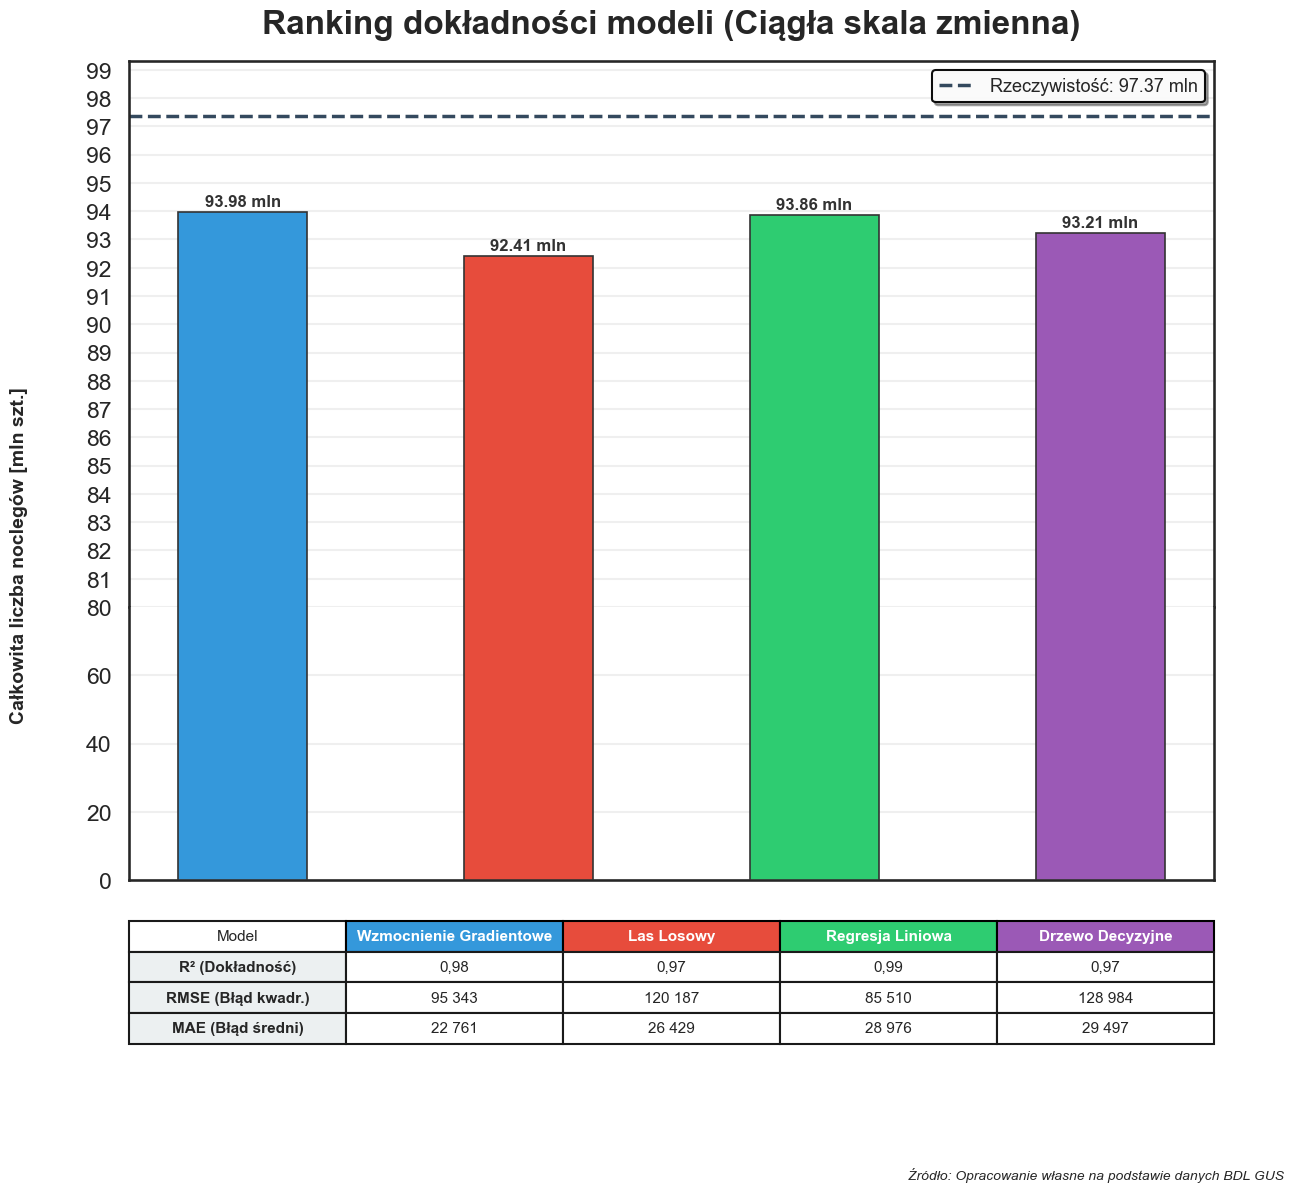

Gotowe! Wykres zapisany w: Final_Porownanie_Modeli_R2/Wykres_Finalny_Z_Legenda.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# --- USTAWIENIA STYLU ---
sns.set_theme(style="white", context="talk")
plt.rcParams['font.family'] = 'Arial'

# 1. KONFIGURACJA PLIKÓW
models_config = [
    {
        "name": "Wzmocnienie Gradientowe", 
        "filename": "Prognoza_WG_2024.csv",
        "col_pred": "Prognoza_WG_2024", "col_true": "Rzeczywiste_2024", "color": "#3498db"
    },
    {
        "name": "Las Losowy", 
        "filename": "Wyniki_Walidacja_2024.csv", 
        "col_pred": "Prognoza", "col_true": "Udzielone_Noclegi", "color": "#e74c3c"
    },
    {
        "name": "Regresja Liniowa", 
        "filename": "Prognoza_RL_2024.csv",
        "col_pred": "Prognoza_RL_2024", "col_true": "Rzeczywiste_2024", "color": "#2ecc71"
    },
    {
        "name": "Drzewo Decyzyjne", 
        "filename": "Prognoza_DD_2024.csv",
        "col_pred": "Prognoza_DD_2024", "col_true": "Rzeczywiste_2024", "color": "#9b59b6"
    }
]

# 2. INTELIGENTNE WCZYTYWANIE DANYCH
results = []
real_sum_global = 0

print("--- ROZPOCZYNAM POSZUKIWANIE PLIKÓW ---")

for m in models_config:
    # Lista miejsc, gdzie kod będzie szukał pliku
    possible_paths = [
        m['filename'],                                      # 1. W tym samym folderze
        os.path.join("Regresja Lasów Losowych", m['filename']), 
        os.path.join("Wyniki_Wzmocnienie_Gradientowe", m['filename']),
        os.path.join("Wyniki_Regresja_Liniowa", m['filename']),
        os.path.join("Wyniki_Drzewo_Decyzyjne", m['filename']),
        # Pełna ścieżka "na wszelki wypadek"
        r"C:\Nazar Haievskyj\Dane w" + "\\" + m['filename'] 
    ]
    
    file_loaded = False
    
    for path in possible_paths:
        if os.path.exists(path):
            try:
                df = pd.read_csv(path, sep=';')
                if df.shape[1] < 2: df = pd.read_csv(path, sep=',')
                df.columns = df.columns.str.strip()
                
                if m['col_true'] in df.columns and m['col_pred'] in df.columns:
                    y_true = df[m['col_true']]
                    y_pred = df[m['col_pred']]
                    
                    results.append({
                        "Model": m['name'],
                        "Suma": y_pred.sum(),
                        "R2": r2_score(y_true, y_pred),
                        "MAE": mean_absolute_error(y_true, y_pred),
                        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
                        "Color": m['color']
                    })
                    
                    if real_sum_global == 0: real_sum_global = y_true.sum()
                    print(f"[SUKCES] Znaleziono '{m['name']}' w: {path}")
                    file_loaded = True
                    break 
            except Exception as e:
                print(f"[BŁĄD PLIKU] {path}: {e}")
    
    if not file_loaded:
        print(f"[UWAGA] Nie udało się znaleźć pliku dla: {m['name']}")

df_res = pd.DataFrame(results)

# 3. TWORZENIE WYKRESU (FINALNA WERSJA)
if not df_res.empty:
    # Układ: Góra (detale) + Dół (baza), sklejone (hspace=0)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 13), 
                                   gridspec_kw={'height_ratios': [2, 1], 'hspace': 0})

    # Rysujemy na obu osiach
    for ax in (ax1, ax2):
        bars = ax.bar(
            df_res['Model'], df_res['Suma'] / 1_000_000, 
            color=df_res['Color'], edgecolor='#333333', linewidth=1.2, width=0.45, zorder=3
        )
        # Linia rzeczywistości (Dodajemy LABEL dla legendy)
        ax.axhline(
            y=real_sum_global/1_000_000, 
            color='#34495e', linestyle='--', linewidth=2.5, zorder=2,
            label=f'Rzeczywistość: {real_sum_global/1_000_000:.2f} mln'
        )
        ax.grid(axis='y', linestyle='-', alpha=0.3, zorder=0)

    # --- CZĘŚĆ GÓRNA (80 - MAX) ---
    max_val = max((df_res['Suma'].max()/1e6), (real_sum_global/1e6))
    ax1.set_ylim(80, max_val * 1.02)
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(1)) # Krok co 1 mln
    
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(axis='x', length=0)

    # Podpisy słupków
    for bar in bars:
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width()/2, height + 0.1, 
            f'{height:.2f} mln', ha='center', va='bottom', fontweight='bold', fontsize=12, color='#333333'
        )

    # --- LEGENDA ZBOKU (TO O CO PROSIŁEŚ) ---
    # Dodajemy legendę tylko do górnego wykresu, żeby nie dublować
    ax1.legend(loc='upper right', frameon=True, fontsize=13, framealpha=0.95, edgecolor='black', shadow=True)

    ax1.set_title("Ranking dokładności modeli (Ciągła skala zmienna)", fontsize=24, fontweight='bold', pad=20)

    # --- CZĘŚĆ DOLNA (0 - 80) ---
    ax2.set_ylim(0, 80)
    ax2.set_yticks([0, 20, 40, 60]) # Krok co 20 mln
    ax2.spines['top'].set_visible(False)

    # Etykieta Y
    fig.text(0.04, 0.5, "Całkowita liczba noclegów [mln szt.]", va='center', rotation='vertical', fontsize=14, fontweight='bold')

    # --- TABELA ---
    table_cols = ["Model"] + df_res['Model'].tolist()
    row_r2 = ["R² (Dokładność)"] + [f"{x:.2f}".replace(".", ",") for x in df_res['R2']]
    row_rmse = ["RMSE (Błąd kwadr.)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['RMSE']]
    row_mae = ["MAE (Błąd średni)"] + [f"{x:,.0f}".replace(",", " ") for x in df_res['MAE']]
    table_vals = [row_r2, row_rmse, row_mae]

    the_table = plt.table(
        cellText=table_vals, colLabels=table_cols, loc='bottom',
        bbox=[0.0, -0.6, 1.0, 0.45], cellLoc='center'
    )
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(11)
    the_table.scale(1, 1.8)

    # Kolory tabeli
    for i, key in enumerate(df_res['Model']):
        cell = the_table[0, i+1]
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor(df_res.iloc[i]['Color'])
        cell.set_edgecolor('black')
        
    for i in range(len(table_vals)):
        cell = the_table[i+1, 0]
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#ecf0f1')

    ax2.set_xticks([]) 
    
    plt.figtext(0.95, 0.02, "Źródło: Opracowanie własne na podstawie danych BDL GUS", ha="right", fontsize=10, style='italic')
    plt.subplots_adjust(bottom=0.25)

    # Zapis
    os.makedirs("Final_Porownanie_Modeli_R2", exist_ok=True)
    save_path = "Final_Porownanie_Modeli_R2/Wykres_Finalny_Z_Legenda.png"
    plt.savefig(save_path, dpi=300)
    plt.show()
    print(f"Gotowe! Wykres zapisany w: {save_path}")

else:
    print("\nBŁĄD: Nadal brak danych. Sprawdź, czy pliki są w folderze.")